<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_nlp/blob/main/%D0%93%D0%BB%D0%B0%D0%B4%D1%8B%D1%88%D0%B5%D0%B2%D0%92%D0%92_NLP_HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 2 Гладышев ВВ

## Подготовка

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import classification_report

In [3]:
positive = pd.read_csv('positive.csv', sep=';', header=None, usecols=[3], names=['text'])
positive['label'] = 'positive'
positive.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [4]:
negative = pd.read_csv('negative.csv', sep=';', header=None, usecols=[3], names=['text'])
negative['label'] = 'negative'
negative.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [50]:
data = pd.concat([positive, negative])
data.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [51]:
data.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


### Очистка

In [52]:
data['text'] = data['text'].apply(lambda x: re.sub("@[\w]*", "", x))

In [53]:
data['text'] = data['text'].str.lower()

In [54]:
emoticon_dict = {
":)": "позитив",
":‑)": "позитив",
":-]": "позитив",
":-3": "позитив",
":->": "позитив",
"8-)": "позитив",
":-}": "позитив",
":o)": "позитив",
":c)": "позитив",
":^)": "позитив",
"=]": "позитив",
"=)": "позитив",
"<3": "позитив",
":-(": "негатив",
":(": "негатив",
":c": "негатив",
":<": "негатив",
":[": "негатив",
">:[": "негатив",
":{": "негатив",
">:(": "негатив",
":-c": "негатив",
":-< ": "негатив",
":-[": "негатив",
":-||": "негатив"
}

In [55]:
def emoticon_replace(s: str) -> str:
    for word in s.split():
        if word in emoticon_dict.keys():
            s = s.replace(word, emoticon_dict[word])
    return s

In [56]:
data['text'] = data['text'].apply(emoticon_replace)

In [57]:
data['text'] = data['text'].apply(lambda x: re.sub("[^ёа-я()]", " ", x))

In [58]:
data['text'] = data['text'].apply(lambda x: re.sub("[()]", r' \g<0> ', x))

In [59]:
data['text'] = data['text'].apply(lambda x: re.sub("\s+", ' ', x))

In [60]:
data['text'] = data['text'].apply(lambda x: re.sub("\\n", '', x))

In [61]:
data['text'].head(10)

0     хоть я и школота но поверь у нас то же самое ...
1    да все таки он немного похож на него но мой ма...
2                ну ты идиотка ) я испугалась за тебя 
3     кто то в углу сидит и погибает от голода а мы...
4     вот что значит страшилка но блин посмотрев вс...
5              ну любишь или нет я не знаю кто ты бля 
6     ох ну это конечно же чтобы у нее было много д...
7       у тебя есть ухажёр нет мои уши не кто не жрёт 
8              поприветствуем моего нового читателя ) 
9          теперь у меня есть частичка сиднея позитив 
Name: text, dtype: object

In [68]:
data.iloc[0, 0]

' хоть я и школота но поверь у нас то же самое общество профилирующий предмет типа ) '

In [62]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

In [63]:
data['lemma'] =  data['text'].apply(lambda x: mystem_analyzer.lemmatize(x))

In [69]:
data.iloc[0, 2]

[' ',
 'хоть',
 ' ',
 'я',
 ' ',
 'и',
 ' ',
 'школоть',
 ' ',
 'но',
 ' ',
 'поверять',
 ' ',
 'у',
 ' ',
 'мы',
 ' ',
 'то',
 ' ',
 'же',
 ' ',
 'самый',
 ' ',
 'общество',
 ' ',
 'профилировать',
 ' ',
 'предмет',
 ' ',
 'тип',
 ' ) \n']

In [64]:
data['lemma_str'] =  data['lemma'].apply(lambda x: ''.join(x))

In [71]:
data.iloc[0, 3]

' хоть я и школоть но поверять у мы то же самый общество профилировать предмет тип ) \n'

In [72]:
data['lemma_str'] = data['lemma_str'].apply(lambda x: re.sub("\\n", '', x))

In [73]:
data.iloc[0, 3]

' хоть я и школоть но поверять у мы то же самый общество профилировать предмет тип ) '

In [74]:
data.head()

,text,label,lemma,lemma_str
0,хоть я и школота но поверь у нас то же самое ...,positive,"[ , хоть, , я, , и, , школоть, , но, , по...",хоть я и школоть но поверять у мы то же самый...
1,да все таки он немного похож на него но мой ма...,positive,"[да, , весь, , таки, , он, , немного, , п...",да весь таки он немного похожий на он но мой м...
2,ну ты идиотка ) я испугалась за тебя,positive,"[ , ну, , ты, , идиотка, ) , я, , испугать...",ну ты идиотка ) я испугаться за ты
3,кто то в углу сидит и погибает от голода а мы...,positive,"[ , кто, , то, , в, , угол, , сидеть, , и...",кто то в угол сидеть и погибать от голод а мы...
4,вот что значит страшилка но блин посмотрев вс...,positive,"[ , вот, , что, , значить, , страшилка, , ...",вот что значить страшилка но блин посмотреть ...


In [75]:
data.tail()

,text,label,lemma,lemma_str
111918,но не каждый хочет что то исправлять (,negative,"[но, , не, , каждый, , хотеть, , что, , т...",но не каждый хотеть что то исправлять (
111919,скучаю так негатив только вправляет мозги но я...,negative,"[скучать, , так, , негатив, , только, , вп...",скучать так негатив только вправлять мозги но ...
111920,вот и в школу в говно это идти уже надо (,negative,"[вот, , и, , в, , школа, , в, , гавно, ,...",вот и в школа в гавно это идти уже надо (
111921,тауриэль не грусти негатив обнял,negative,"[ , тауриэль, , не, , грустить, , негатив, ...",тауриэль не грустить негатив обнимать
111922,такси везет меня на работу раздумываю приплати...,negative,"[такси, , везти, , я, , на, , работа, , р...",такси везти я на работа раздумывать приплачива...


## Задание 1

Задание 1: обучите три классификатора:

1. на токенах с высокой частотой;
2. на токенах со средней частотой;
3. на токенах с низкой частотой.

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

In [76]:
from collections import Counter

In [80]:
corpus = [word for tweet in data.lemma_str for word in tweet.split() if word != ' ']
print(len(corpus))
corpus[:20]

2902398


['хоть',
 'я',
 'и',
 'школоть',
 'но',
 'поверять',
 'у',
 'мы',
 'то',
 'же',
 'самый',
 'общество',
 'профилировать',
 'предмет',
 'тип',
 ')',
 'да',
 'весь',
 'таки',
 'он']

In [81]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('(', 191236),
 (')', 180867),
 ('я', 108382),
 ('не', 75058),
 ('и', 60923),
 ('в', 57597),
 ('что', 38641),
 ('на', 38253),
 ('а', 36439),
 ('быть', 32829)]

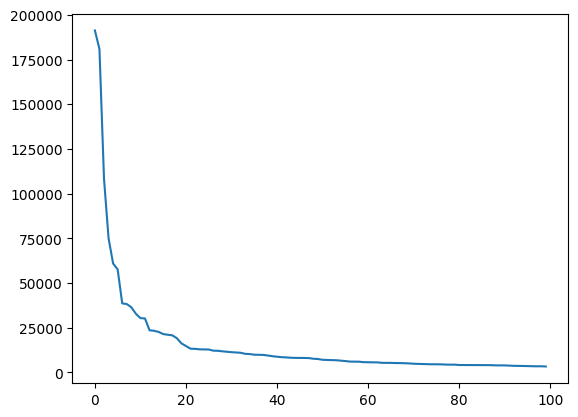

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

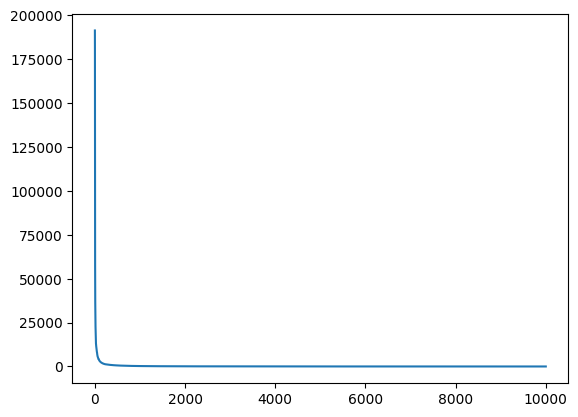

In [85]:
first_10000_freqs = [freq for word, freq in freq_dict_sorted[:10000]]
plt.plot(first_10000_freqs)
plt.show()

In [86]:
first_all_freqs = [freq for word, freq in freq_dict_sorted]

In [87]:
len(first_all_freqs)

93324

In [89]:
first_all_freqs[0], first_all_freqs[int(len(first_all_freqs)/2)], first_all_freqs[-1000]

(191236, 1, 1)

In [90]:
first_all_freqs[5000]

32

In [91]:
total = 0
for n in first_all_freqs:
    total += n

print(total)

2902398


In [92]:
cnt = 0
for i, n in enumerate(first_all_freqs):
    cnt += n
    if cnt > int(total/3):
        print(f"i: {i} n: {n} cnt: {cnt}")
        break

i: 15 n: 21468 cnt: 971827


In [93]:
cnt = 0
for i, n in enumerate(first_all_freqs):
    cnt += n
    if cnt > int(total*0.66666):
        print(f"i: {i} n: {n} cnt: {cnt}")
        break

i: 292 n: 1041 cnt: 1935687


In [105]:
corpus_dict = pd.DataFrame(freq_dict.items(), columns=['token', 'number'])
corpus_dict.head()

,token,number
0,хоть,2161
1,я,108382
2,и,60923
3,школоть,35
4,но,16269


In [159]:
most_fr = corpus_dict.loc[corpus_dict['number'] >= 21468, 'token'].tolist()

In [160]:
most_fr = [*most_fr, '( ', ') ', ' (', ' )', ' ( ', ' ) ']
most_fr

['я',
 'и',
 'у',
 'то',
 ')',
 'на',
 'ты',
 'в',
 'а',
 'не',
 'что',
 'это',
 'быть',
 'как',
 'с',
 '(',
 '( ',
 ') ',
 ' (',
 ' )',
 ' ( ',
 ' ) ']

In [165]:
mid_fr = corpus_dict.loc[(corpus_dict['number'] < 21468) & (corpus_dict['number'] >= 1041), 'token'].tolist()

In [166]:
mid_fr[:15]

['хоть',
 'но',
 'мы',
 'же',
 'самый',
 'да',
 'весь',
 'таки',
 'он',
 'мой',
 'равный',
 'хороший',
 'ну',
 'за',
 'кто']

In [167]:
less_fr = corpus_dict.loc[corpus_dict['number'] < 1041, 'token'].tolist()

In [168]:
less_fr[:15]

['школоть',
 'поверять',
 'общество',
 'профилировать',
 'предмет',
 'тип',
 'немного',
 'похожий',
 'мальчик',
 'идиотка',
 'испугаться',
 'угол',
 'погибать',
 'голод',
 'порция']

In [175]:
except_list = [*most_fr, *mid_fr, " ", "\n", "\n ", " \n", " \n "]
except_list[:20], except_list[-20:]

(['я',
  'и',
  'у',
  'то',
  ')',
  'на',
  'ты',
  'в',
  'а',
  'не',
  'что',
  'это',
  'быть',
  'как',
  'с',
  '(',
  '( ',
  ') ',
  ' (',
  ' )'],
 ['чувствовать',
  'твиттер',
  'быстро',
  'помогать',
  'красивый',
  'месяц',
  'подарок',
  'привет',
  'приходиться',
  'дом',
  'скучать',
  'уходить',
  'ладно',
  'нельзя',
  'негатив',
  ' ',
  '\n',
  '\n ',
  ' \n',
  ' \n '])

In [170]:
data['lemma_most_fr'] =  data['lemma'].apply(lambda x: [fr_word for fr_word in x if fr_word in most_fr])

In [171]:
data['lemma_mid_fr'] =  data['lemma'].apply(lambda x: [fr_word for fr_word in x if fr_word in mid_fr])

In [176]:
data['lemma_less_fr'] =  data['lemma'].apply(lambda x: [fr_word for fr_word in x if fr_word not in except_list])

In [177]:
data.head()

,text,label,lemma,lemma_str,lemma_most_fr,lemma_mid_fr,lemma_less_fr
0,хоть я и школота но поверь у нас то же самое ...,positive,"[ , хоть, , я, , и, , школоть, , но, , по...",хоть я и школоть но поверять у мы то же самый...,"[я, и, у, то]","[хоть, но, мы, же, самый]","[школоть, поверять, общество, профилировать, п..."
1,да все таки он немного похож на него но мой ма...,positive,"[да, , весь, , таки, , он, , немного, , п...",да весь таки он немного похожий на он но мой м...,[на],"[да, весь, таки, он, он, но, мой, весь, равный...","[немного, похожий, мальчик]"
2,ну ты идиотка ) я испугалась за тебя,positive,"[ , ну, , ты, , идиотка, ) , я, , испугать...",ну ты идиотка ) я испугаться за ты,"[ты, ) , я, ты]","[ну, за]","[идиотка, испугаться]"
3,кто то в углу сидит и погибает от голода а мы...,positive,"[ , кто, , то, , в, , угол, , сидеть, , и...",кто то в угол сидеть и погибать от голод а мы...,"[то, в, и, а, и, не]","[кто, сидеть, от, мы, еще, взять, хотя, уже, т...","[угол, погибать, голод, порция, жрать]"
4,вот что значит страшилка но блин посмотрев вс...,positive,"[ , вот, , что, , значить, , страшилка, , ...",вот что значить страшилка но блин посмотреть ...,"[что, у, ты, что, что, то]","[вот, но, блин, посмотреть, весь]","[значить, страшилка, часть, создаваться, ощуще..."


In [178]:
data['lemma_most_fr'] =  data['lemma_most_fr'].apply(lambda x: ' '.join(x))

In [179]:
data['lemma_mid_fr'] =  data['lemma_mid_fr'].apply(lambda x: ' '.join(x))

In [180]:
data['lemma_less_fr'] =  data['lemma_less_fr'].apply(lambda x: ' '.join(x))

In [181]:
data.head()

,text,label,lemma,lemma_str,lemma_most_fr,lemma_mid_fr,lemma_less_fr
0,хоть я и школота но поверь у нас то же самое ...,positive,"[ , хоть, , я, , и, , школоть, , но, , по...",хоть я и школоть но поверять у мы то же самый...,я и у то,хоть но мы же самый,школоть поверять общество профилировать предме...
1,да все таки он немного похож на него но мой ма...,positive,"[да, , весь, , таки, , он, , немного, , п...",да весь таки он немного похожий на он но мой м...,на,да весь таки он он но мой весь равный хороший,немного похожий мальчик
2,ну ты идиотка ) я испугалась за тебя,positive,"[ , ну, , ты, , идиотка, ) , я, , испугать...",ну ты идиотка ) я испугаться за ты,ты ) я ты,ну за,идиотка испугаться
3,кто то в углу сидит и погибает от голода а мы...,positive,"[ , кто, , то, , в, , угол, , сидеть, , и...",кто то в угол сидеть и погибать от голод а мы...,то в и а и не,кто сидеть от мы еще взять хотя уже так хотеть,угол погибать голод порция жрать
4,вот что значит страшилка но блин посмотрев вс...,positive,"[ , вот, , что, , значить, , страшилка, , ...",вот что значить страшилка но блин посмотреть ...,что у ты что что то,вот но блин посмотреть весь,значить страшилка часть создаваться ощущение а...


In [182]:
x_train_ms, x_test_ms, y_train_ms, y_test_ms = train_test_split(data.lemma_most_fr, data.label, test_size=0.2, shuffle=True, random_state=42)
x_train_ms.shape, x_test_ms.shape, y_train_ms.shape, y_test_ms.shape

((181467,), (45367,), (181467,), (45367,))

In [191]:
x_train_ms.head(10)

107097                    не быть
109252                  я и то не
63992                   как ты не
108549    я быть на и я на что не
67962                   что не не
2736                            и
86462                         в и
46916                        )  в
109139              я я и я в  ) 
75839                      и не я
Name: lemma_most_fr, dtype: object

In [183]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_ms)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_ms)
pred = clf.predict(vec.transform(x_test_ms))
print(classification_report(pred, y_test_ms))

              precision    recall  f1-score   support

    negative       0.38      0.60      0.46     14147
    positive       0.75      0.55      0.64     31220

    accuracy                           0.57     45367
   macro avg       0.56      0.57      0.55     45367
weighted avg       0.63      0.57      0.58     45367



In [184]:
x_train_md, x_test_md, y_train_md, y_test_md = train_test_split(data.lemma_mid_fr, data.label, test_size=0.2, shuffle=True, random_state=42)
x_train_md.shape, x_test_md.shape, y_train_md.shape, y_test_md.shape

((181467,), (45367,), (181467,), (45367,))

In [192]:
x_train_md.head(10)

107097    говорить он ничто говорить он
109252                 по твой че давно
63992                           мой уже
108549     вообще по написать так можно
67962                   писать понимать
2736                  завтра очень день
86462      первый день школа еще без да
46916                            вы уже
109139                          из этот
75839                 так столько вчера
Name: lemma_mid_fr, dtype: object

In [185]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_md)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_md)
pred = clf.predict(vec.transform(x_test_md))
print(classification_report(pred, y_test_md))

              precision    recall  f1-score   support

    negative       0.60      0.73      0.66     18431
    positive       0.79      0.67      0.72     26936

    accuracy                           0.70     45367
   macro avg       0.69      0.70      0.69     45367
weighted avg       0.71      0.70      0.70     45367



In [194]:
x_train_mf, x_test_mf, y_train_mf, y_test_mf = train_test_split(data.lemma_less_fr, data.label, test_size=0.2, shuffle=True, random_state=42)
x_train_mf.shape, x_test_mf.shape, y_train_mf.shape, y_test_mf.shape

((181467,), (45367,), (181467,), (45367,))

In [195]:
x_train_mf.head(10)

107097                               немного выпивать  ) \n
109252             общение шутка соскучиться видеться  ( \n
63992                      ахахаахх собака называть  ) ) \n
108549    лично барабан гиа заморачиваться списывать спо...
67962                наташа реальный китаец хер  ) ) ) ) \n
2736                            сложный ответственный  ( \n
86462                                       ( (  печальбеда
46916     наряжать елка гигантский рождественский шар нь...
109139                            минск учиться белка днище
75839                         стыдно удобно обижать  ( ( \n
Name: lemma_less_fr, dtype: object

In [196]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_mf)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_mf)
pred = clf.predict(vec.transform(x_test_mf))
print(classification_report(pred, y_test_mf))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.70      0.68      0.69     22909
    positive       0.68      0.70      0.69     22458

    accuracy                           0.69     45367
   macro avg       0.69      0.69      0.69     45367
weighted avg       0.69      0.69      0.69     45367



## Задание 2

Найти фичи с наибольшей значимостью, и вывести их.

In [224]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.78      0.88     28682
    positive       0.73      1.00      0.84     16685

    accuracy                           0.86     45367
   macro avg       0.86      0.89      0.86     45367
weighted avg       0.90      0.86      0.87     45367



In [225]:
cool_token = '('
pred = ['negative' if cool_token in tweet else 'positive' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.76      1.00      0.87     17180
    positive       1.00      0.81      0.90     28187

    accuracy                           0.88     45367
   macro avg       0.88      0.91      0.88     45367
weighted avg       0.91      0.88      0.88     45367



## Задание 3

1. сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2. подобрать оптимальный размер для hashing векторайзера

3. убедиться что для сетки нет переобучения.

### Необработанный текст

In [5]:
data_raw = pd.concat([positive, negative])
data_raw.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [8]:
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(data_raw.text, data_raw.label, test_size=0.2, shuffle=True, random_state=42)

In [199]:
x_train_raw.head()

107097    Немного выпьем, говорил он, ничего не будет, г...
109252    я по твоему общению и шуткам соскучилась! Че-т...
63992     @sergey_mladshiy ахахаахх....как ты мою собаку...
108549    @dasha_0305 @daria2709 лично мне,было вообще п...
67962     Наташа реальный китаец пишет что не хера не по...
Name: text, dtype: object

In [200]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_raw)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_raw)
pred = clf.predict(vec.transform(x_test_raw))
print(classification_report(pred, y_test_raw))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.77      0.76      0.76     22711
    positive       0.76      0.77      0.77     22656

    accuracy                           0.77     45367
   macro avg       0.77      0.77      0.77     45367
weighted avg       0.77      0.77      0.77     45367



In [201]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_raw)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_raw)
pred = clf.predict(vec.transform(x_test_raw))
print(classification_report(pred, y_test_raw))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.74      0.77      0.75     21507
    positive       0.78      0.75      0.77     23860

    accuracy                           0.76     45367
   macro avg       0.76      0.76      0.76     45367
weighted avg       0.76      0.76      0.76     45367



In [202]:
vec = HashingVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_raw)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_raw)
pred = clf.predict(vec.transform(x_test_raw))
print(classification_report(pred, y_test_raw))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.72      0.76      0.74     21366
    positive       0.78      0.74      0.76     24001

    accuracy                           0.75     45367
   macro avg       0.75      0.75      0.75     45367
weighted avg       0.75      0.75      0.75     45367



In [215]:
import nltk
nltk.download('punkt')

vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train_raw)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_raw)
pred = clf.predict(vec.transform(x_test_raw))
print(classification_report(pred, y_test_raw))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     22445
    positive       1.00      1.00      1.00     22922

    accuracy                           1.00     45367
   macro avg       1.00      1.00      1.00     45367
weighted avg       1.00      1.00      1.00     45367



### Текст без лемматизации

In [203]:
x_train, x_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.2, shuffle=True, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((181467,), (45367,), (181467,), (45367,))

In [204]:
x_train.head()

107097    немного выпьем говорил он ничего не будет гово...
109252    я по твоему общению и шуткам соскучилась че то...
63992        ахахаахх как ты мою собаку уже не называл ) ) 
108549     лично мне было вообще по барабану на гиа и я ...
67962     наташа реальный китаец пишет что не хера не по...
Name: text, dtype: object

In [205]:
x_test.head()

100170    мыс на меня обиделась ( я ей даже ничего не сд...
105843       аааааааааааааааааааа не хочу на работу негатив
60463     у меня какой то особенный вид ушей некоторые в...
98352      он неплохой человек в жизни я работала в шоу ...
113055     домааааа ехали на такси пели песни отдыхали к...
Name: text, dtype: object

In [206]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.76      0.78      0.77     21821
    positive       0.79      0.77      0.78     23546

    accuracy                           0.78     45367
   macro avg       0.78      0.78      0.78     45367
weighted avg       0.78      0.78      0.78     45367



In [207]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.74      0.80      0.77     20909
    positive       0.81      0.76      0.79     24458

    accuracy                           0.78     45367
   macro avg       0.78      0.78      0.78     45367
weighted avg       0.78      0.78      0.78     45367



In [208]:
vec = HashingVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.73      0.79      0.76     20749
    positive       0.81      0.76      0.78     24618

    accuracy                           0.77     45367
   macro avg       0.77      0.77      0.77     45367
weighted avg       0.78      0.77      0.77     45367



In [216]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     21717
    positive       1.00      0.96      0.98     23650

    accuracy                           0.98     45367
   macro avg       0.98      0.98      0.98     45367
weighted avg       0.98      0.98      0.98     45367



### Текст с лемматизацией

In [209]:
x_train_lemma, x_test_lemma, y_train_lemma, y_test_lemma = train_test_split(data.lemma_str, data.label, test_size=0.2, shuffle=True, random_state=42)
x_train_lemma.shape, x_test_lemma.shape, y_train_lemma.shape, y_test_lemma.shape

((181467,), (45367,), (181467,), (45367,))

In [210]:
x_train_lemma.head()

107097    немного выпивать говорить он ничто не быть гов...
109252    я по твой общение и шутка соскучиться че то да...
63992       ахахаахх как ты мой собака уже не называть ) ) 
108549     лично я быть вообще по барабан на гиа и я нап...
67962     наташа реальный китаец писать что не хер не по...
Name: lemma_str, dtype: object

In [211]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_lemma)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_lemma)
pred = clf.predict(vec.transform(x_test_lemma))
print(classification_report(pred, y_test_lemma))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.75      0.78      0.77     21532
    positive       0.79      0.76      0.78     23835

    accuracy                           0.77     45367
   macro avg       0.77      0.77      0.77     45367
weighted avg       0.77      0.77      0.77     45367



In [212]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_lemma)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_lemma)
pred = clf.predict(vec.transform(x_test_lemma))
print(classification_report(pred, y_test_lemma))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.74      0.79      0.77     21086
    positive       0.81      0.76      0.78     24281

    accuracy                           0.77     45367
   macro avg       0.77      0.78      0.77     45367
weighted avg       0.78      0.77      0.77     45367



In [213]:
vec = HashingVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_lemma)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_lemma)
pred = clf.predict(vec.transform(x_test_lemma))
print(classification_report(pred, y_test_lemma))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.74      0.79      0.76     21124
    positive       0.80      0.76      0.78     24243

    accuracy                           0.77     45367
   macro avg       0.77      0.77      0.77     45367
weighted avg       0.77      0.77      0.77     45367



In [217]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train_lemma)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_lemma)
pred = clf.predict(vec.transform(x_test_lemma))
print(classification_report(pred, y_test_lemma))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     21720
    positive       1.00      0.96      0.98     23647

    accuracy                           0.98     45367
   macro avg       0.98      0.98      0.98     45367
weighted avg       0.98      0.98      0.98     45367



### Добавим n-граммы

In [218]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.74      0.80      0.77     20909
    positive       0.81      0.76      0.79     24458

    accuracy                           0.78     45367
   macro avg       0.78      0.78      0.78     45367
weighted avg       0.78      0.78      0.78     45367



In [219]:
vec = TfidfVectorizer(ngram_range=(1, 2))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.77      0.80      0.78     21753
    positive       0.81      0.78      0.79     23614

    accuracy                           0.79     45367
   macro avg       0.79      0.79      0.79     45367
weighted avg       0.79      0.79      0.79     45367



In [220]:
vec = TfidfVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.66      0.74      0.70     20096
    positive       0.77      0.70      0.73     25271

    accuracy                           0.72     45367
   macro avg       0.72      0.72      0.72     45367
weighted avg       0.72      0.72      0.72     45367



In [221]:
vec = TfidfVectorizer(ngram_range=(1, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.79      0.78      0.78     22832
    positive       0.78      0.79      0.78     22535

    accuracy                           0.78     45367
   macro avg       0.78      0.78      0.78     45367
weighted avg       0.78      0.78      0.78     45367



In [222]:
vec = TfidfVectorizer(ngram_range=(2, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.66      0.73      0.70     20346
    positive       0.76      0.70      0.73     25021

    accuracy                           0.71     45367
   macro avg       0.71      0.72      0.71     45367
weighted avg       0.72      0.71      0.71     45367



In [223]:
vec = TfidfVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.45      0.74      0.56     13715
    positive       0.84      0.61      0.71     31652

    accuracy                           0.65     45367
   macro avg       0.65      0.67      0.63     45367
weighted avg       0.73      0.65      0.66     45367



In [226]:
vec = TfidfVectorizer(ngram_range=(1, 2))
bow = vec.fit_transform(x_train_lemma)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_lemma)
pred = clf.predict(vec.transform(x_test_lemma))
print(classification_report(pred, y_test_lemma))

              precision    recall  f1-score   support

    negative       0.76      0.80      0.78     21411
    positive       0.81      0.78      0.80     23956

    accuracy                           0.79     45367
   macro avg       0.79      0.79      0.79     45367
weighted avg       0.79      0.79      0.79     45367



In [227]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.93      0.95      0.94     21934
    positive       0.95      0.93      0.94     23433

    accuracy                           0.94     45367
   macro avg       0.94      0.94      0.94     45367
weighted avg       0.94      0.94      0.94     45367



In [228]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train_raw)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train_raw)
pred = clf.predict(vec.transform(x_test_raw))
print(classification_report(pred, y_test_raw))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.99      1.00      1.00     22382
    positive       1.00      0.99      1.00     22985

    accuracy                           1.00     45367
   macro avg       1.00      1.00      1.00     45367
weighted avg       1.00      1.00      1.00     45367



### Подбор оптимального размера для hashing векторайзера

In [230]:
for i in range(2, 11):
    print(f'HashingVectorizer features: {2**i}')
    vec = HashingVectorizer(ngram_range=(1, 1), n_features=2**i)
    bow = vec.fit_transform(x_train)
    clf = LogisticRegression(random_state=42)
    clf.fit(bow, y_train)
    pred = clf.predict(vec.transform(x_test))
    print(classification_report(pred, y_test))
    print()

HashingVectorizer features: 4
              precision    recall  f1-score   support

    negative       0.41      0.52      0.46     17898
    positive       0.62      0.52      0.57     27469

    accuracy                           0.52     45367
   macro avg       0.52      0.52      0.51     45367
weighted avg       0.54      0.52      0.52     45367


HashingVectorizer features: 8
              precision    recall  f1-score   support

    negative       0.47      0.54      0.50     19361
    positive       0.61      0.54      0.57     26006

    accuracy                           0.54     45367
   macro avg       0.54      0.54      0.54     45367
weighted avg       0.55      0.54      0.54     45367


HashingVectorizer features: 16
              precision    recall  f1-score   support

    negative       0.53      0.57      0.55     20789
    positive       0.61      0.57      0.59     24578

    accuracy                           0.57     45367
   macro avg       0.57      0.57  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.66      0.71      0.69     20832
    positive       0.74      0.69      0.71     24535

    accuracy                           0.70     45367
   macro avg       0.70      0.70      0.70     45367
weighted avg       0.70      0.70      0.70     45367


